In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Problem: Calories_consumed-> predict weight gained using calories consumed

In [4]:
q1 = pd.read_csv('calories_consumed.csv')

In [5]:
q1.head()

,Weight gained (grams),Calories Consumed
0,108,1500
1,200,2300
2,900,3400
3,200,2200
4,300,2500


In [6]:
# Here the dependent variable is weight gained and the independent variable is Calories consumed.
# Y - Weight gained (grams) , X - Calories Consumed

In [7]:
#Scatter-plot of X vs Y to understand the Strength, direction and Linearity of the relationship 
# between X and Y.

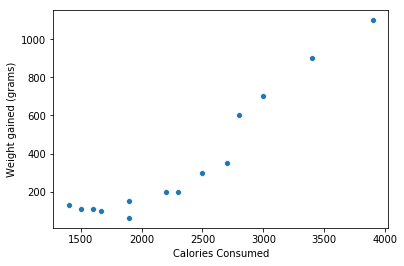

In [8]:
sns.scatterplot(x = q1['Calories Consumed'],y=q1['Weight gained (grams)'])

In [9]:
#It can be observed that in general there is a positive linear relationship between 
# Calories Consumed and Weight gained. The strength of the relationship is subjective however,
# Therefore, we can quantify the strength by computing the correlation co-efficient between x and y.

In [10]:
np.corrcoef(q1['Weight gained (grams)'],q1['Calories Consumed'])

array([[1.        , 0.94699101],
       [0.94699101, 1.        ]])

In [11]:
# We can observe a strong positive correlation between X and Y because correlation coefficient is 0.94.
#Correlation coefficient is > 0.85, so we can infer a strong correlation.

In [12]:
#Lets create a simple linear regression model to regress Y onto X.
import statsmodels.api as sm

x = q1['Calories Consumed']
y = q1['Weight gained (grams)']   

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
model.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Weight gained (grams)   R-squared:                       0.897
Model:                               OLS   Adj. R-squared:                  0.888
Method:                    Least Squares   F-statistic:                     104.3
Date:                   Wed, 08 Jul 2020   Prob (F-statistic):           2.86e-07
Time:                           00:51:08   Log-Likelihood:                -84.792
No. Observations:                     14   AIC:                             173.6
Df Residuals:                         12   BIC:                             174.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -625.7524    100.823     -6.206      0.000    -845.427    -406.078
Calories Consumed     0.4202      0.041     10.211      0.000       0.331       0.510
==============================================================================
Omnibus:                        3.394   Durbin-Watson:                   2.537
Prob(Omnibus):                  0.183   Jarque-Bera (JB):                1.227
Skew:                          -0.203   Prob(JB):                        0.541
Kurtosis:                       1.608   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Compute the predictions and residuals.
pred = model.predict(x)

In [14]:
# Residuals are the difference between Actual and predicted values.
res = q1['Weight gained (grams)'] - pred
sqres = res*res
mse = np.mean(sqres)
rmse = np.sqrt(mse)

In [36]:
print(rmse)

103.30250194726935


In [15]:
# The current Rmse suggests that on average our prediction would be off from the actual value by
# approximately 103 grams.

#An R^2 value of 0.897 suggests that 89% of the variance in weight gained is explained by calories consumed.

# From the regression summary table we can infer that the calories consumed is significant and the overall
# model is also significant.

In [16]:
# Attempting transformations to try to improve the model performance. 

In [18]:
# Log transformation
# x - log(Calories Consumed) y - Weight Gained

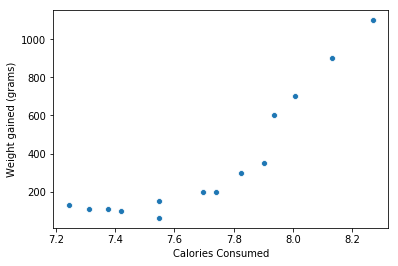

In [19]:
#scatter plot of log transformed calories consumed vs weight gained
sns.scatterplot(x=np.log(q1['Calories Consumed']),y=q1['Weight gained (grams)'])

In [20]:
np.corrcoef(np.log(q1['Calories Consumed']),q1['Weight gained (grams)'])

array([[1.        , 0.89872528],
       [0.89872528, 1.        ]])

In [21]:
# After log transformation of x the correlation has decreased slightly.

In [22]:
x = q1['Calories Consumed']
y = q1['Weight gained (grams)']

x = np.log(x)

x = sm.add_constant(x)
model1 = sm.OLS(y,x).fit()
model1.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Weight gained (grams)   R-squared:                       0.808
Model:                               OLS   Adj. R-squared:                  0.792
Method:                    Least Squares   F-statistic:                     50.40
Date:                   Wed, 08 Jul 2020   Prob (F-statistic):           1.25e-05
Time:                           00:53:29   Log-Likelihood:                -89.148
No. Observations:                     14   AIC:                             182.3
Df Residuals:                         12   BIC:                             183.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6955.6501   1030.908     -6.747      0.000   -9201.806   -4709.494
Calories Consumed   948.3717    133.580      7.100      0.000     657.325    1239.418
==============================================================================
Omnibus:                        3.265   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.139
Skew:                           0.046   Prob(JB):                        0.566
Kurtosis:                       1.606   Cond. No.                         199.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# We can see that the log transformed calories consumed is significant by confirming the p-value pertaining to Log(calories consumed)

In [24]:
#Predictions based on log transformed calories consumed.
pred1 = model1.predict(x)
res1 = q1['Weight gained (grams)'] - pred1
sqres1 = res1*res1
mse1 = np.mean(sqres1)
rmse1 = np.sqrt(mse1)

In [35]:
print(rmse1)

141.0053816942511


In [25]:
#Log transformation of the calories consumed feature results in model with a lower r^2 value 
# and a higher RMSE value as well. We can try other transformations to see if the performance 
# improves.

In [26]:
#Log transformation of weight gained variable
# x - Calories Consumed y - log(Weight Gained)

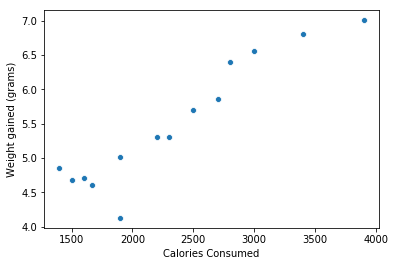

In [27]:
#scatter plot of calories consumed vs log transformed weight gained
sns.scatterplot(x=q1['Calories Consumed'],y=np.log(q1['Weight gained (grams)']))

In [28]:
np.corrcoef(q1['Calories Consumed'],np.log(q1['Weight gained (grams)']))

array([[1.        , 0.93680369],
       [0.93680369, 1.        ]])

In [29]:
#Creating a model regressing log(Y) on X.

In [30]:
x = q1['Calories Consumed']
y = q1['Weight gained (grams)']

y = np.log(y)

x = sm.add_constant(x)

model2 = sm.OLS(y,x).fit()
model2.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Weight gained (grams)   R-squared:                       0.878
Model:                               OLS   Adj. R-squared:                  0.867
Method:                    Least Squares   F-statistic:                     86.04
Date:                   Wed, 08 Jul 2020   Prob (F-statistic):           8.02e-07
Time:                           00:55:08   Log-Likelihood:                -3.3244
No. Observations:                     14   AIC:                             10.65
Df Residuals:                         12   BIC:                             11.93
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.8387      0.299      9.479      0.000       2.186       3.491
Calories Consumed     0.0011      0.000      9.276      0.000       0.001       0.001
==============================================================================
Omnibus:                       10.165   Durbin-Watson:                   3.130
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.120
Skew:                          -1.240   Prob(JB):                       0.0469
Kurtosis:                       5.083   Cond. No.                     8.28e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Our predictor Calories consumed is significant and the model shows a  r^2 score
# of 0.878.

In [32]:
#Predictions based on model 2. Our predictions are in terms of log transformed values.
# We have to transform them to the original scale by applying the exponential function on 
# the predicted values.

In [33]:
#Computing the predictions of this model.
pred2 = model2.predict(x)
pred2 = np.exp(pred2)

In [34]:
#Computing the rmse score for this model.
res2 = q1['Weight gained (grams)'] - pred2
sqres2 = res2*res2
mse2 = np.mean(sqres2)
rmse2 = np.sqrt(mse2)

In [37]:
print(rmse2)

118.04515720118044


In [38]:
#Attempting to transform the X variable(Calories Consumed) to a higher degree.
#There seems to be a slight curvilinear relationship between Weight gained (grams) and Calories consumed. 
# So we can transform x to degree 2 and see how it performs.

In [39]:
x = q1['Calories Consumed']
y = q1['Weight gained (grams)']

#Adding higher degree features to x Dataframe.
x = pd.DataFrame(x)

x = pd.concat([x,x**2],axis=1)

x.columns = ['Calories Consumed','Calories Consumed**2']

In [40]:
# Regressing Y onto X,X**2
x = sm.add_constant(x)

model3 = sm.OLS(y,x).fit()
model3.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Weight gained (grams)   R-squared:                       0.952
Model:                               OLS   Adj. R-squared:                  0.943
Method:                    Least Squares   F-statistic:                     109.2
Date:                   Wed, 08 Jul 2020   Prob (F-statistic):           5.55e-08
Time:                           00:58:13   Log-Likelihood:                -79.425
No. Observations:                     14   AIC:                             164.9
Df Residuals:                         11   BIC:                             166.8
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  203.2585    243.624      0.834      0.422    -332.955     739.472
Calories Consumed       -0.2919      0.202     -1.444      0.177      -0.737       0.153
Calories Consumed**2     0.0001   3.92e-05      3.561      0.004    5.33e-05       0.000
==============================================================================
Omnibus:                        1.621   Durbin-Watson:                   3.058
Prob(Omnibus):                  0.445   Jarque-Bera (JB):                0.996
Skew:                           0.324   Prob(JB):                        0.608
Kurtosis:                       1.865   Cond. No.                     8.12e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.12e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
#We can observe that the variables are not significant, let us drop X and model Y~X**2

In [42]:
x.drop(labels = 'Calories Consumed',axis=1,inplace=True)
model4 = sm.OLS(y,x).fit()
model4.summary()

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Weight gained (grams)   R-squared:                       0.943
Model:                               OLS   Adj. R-squared:                  0.938
Method:                    Least Squares   F-statistic:                     198.4
Date:                   Wed, 08 Jul 2020   Prob (F-statistic):           7.96e-09
Time:                           00:58:33   Log-Likelihood:                -80.641
No. Observations:                     14   AIC:                             165.3
Df Residuals:                         12   BIC:                             166.6
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -143.7949     41.942     -3.428      0.005    -235.180     -52.410
Calories Consumed**2  8.353e-05   5.93e-06     14.085      0.000    7.06e-05    9.64e-05
==============================================================================
Omnibus:                        4.636   Durbin-Watson:                   2.915
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                1.326
Skew:                          -0.081   Prob(JB):                        0.515
Kurtosis:                       1.501   Cond. No.                     1.34e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
#Computing the predictions of this model.
pred4 = model4.predict(x)

In [44]:
#Computing the rmse score for this model.
res4 = q1['Weight gained (grams)'] - pred4
sqres4 = res4*res4
mse4 = np.mean(sqres4)
rmse4 = np.sqrt(mse4)

In [45]:
print(rmse4)

76.7938475345711


In [46]:
#The polynomial regression model has a better fit to the data.